# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


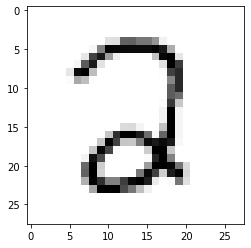

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2374219090574484
train accuracy is: 0.7079786346185946, test accuracy is 0.7273185483870968


Epoch 10 Loss 0.08437893720373921
train accuracy is: 0.9259722917709898, test accuracy is 0.936491935483871


Epoch 20 Loss 0.05259485733844468
train accuracy is: 0.9464196294441662, test accuracy is 0.9551411290322581


Epoch 30 Loss 0.0418567506984621
train accuracy is: 0.9536805207811717, test accuracy is 0.9611895161290323


Epoch 40 Loss 0.036598414658634996
train accuracy is: 0.9595226172592222, test accuracy is 0.9657258064516129


Epoch 50 Loss 0.03338700487381888
train accuracy is: 0.9626105825404774, test accuracy is 0.9652217741935484


Epoch 60 Loss 0.031172135653794827
train accuracy is: 0.9649474211316975, test accuracy is 0.9667338709677419


Epoch 70 Loss 0.029509197807381808
train accuracy is: 0.9670338841595727, test accuracy is 0.967741935483871


Epoch 80 Loss 0.028187255797370254
train accuracy is: 0.9679519278918377, test accuracy is 0.9672379032258065


Epoch 90 Loss 0.027097033630264607
train accuracy is: 0.9686195960607578, test accuracy is 0.9672379032258065


Epoch 100 Loss 0.026164170475067847
train accuracy is: 0.9692038057085628, test accuracy is 0.9682459677419355


Epoch 110 Loss 0.025346588340615473
train accuracy is: 0.970288766483058, test accuracy is 0.9692540322580645


Epoch 120 Loss 0.024622955651166796
train accuracy is: 0.971206810215323, test accuracy is 0.969758064516129


Epoch 130 Loss 0.02396684059741233
train accuracy is: 0.972041395426473, test accuracy is 0.969758064516129


Epoch 140 Loss 0.023365060006645885
train accuracy is: 0.9727090635953931, test accuracy is 0.9707661290322581


Epoch 150 Loss 0.022788641421051775
train accuracy is: 0.9736271073276581, test accuracy is 0.9727822580645161


Epoch 160 Loss 0.02225682989240065
train accuracy is: 0.9740443999332332, test accuracy is 0.9717741935483871


Epoch 170 Loss 0.021742433421963397
train accuracy is: 0.9747120681021533, test accuracy is 0.9717741935483871


Epoch 180 Loss 0.021259815841473167
train accuracy is: 0.9754631947921882, test accuracy is 0.9722782258064516


Epoch 190 Loss 0.02080233993594045
train accuracy is: 0.9760474044399933, test accuracy is 0.9727822580645161


Epoch 200 Loss 0.020366451628439048
train accuracy is: 0.9764646970455684, test accuracy is 0.9732862903225806


Epoch 210 Loss 0.019929337532085378
train accuracy is: 0.9770489066933734, test accuracy is 0.9737903225806451


Epoch 220 Loss 0.019523421786322666
train accuracy is: 0.9774661992989484, test accuracy is 0.9742943548387096


Epoch 230 Loss 0.01912465926986619
train accuracy is: 0.9773827407778334, test accuracy is 0.9753024193548387


Epoch 240 Loss 0.01874952788172077
train accuracy is: 0.9782173259889835, test accuracy is 0.9758064516129032


0.003016493167727615

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.25451172235184705
train accuracy is: 0.6444667000500751, test accuracy is 0.6461693548387096


Epoch 10 Loss 0.10177676595702549
train accuracy is: 0.9181271907861792, test accuracy is 0.9329637096774194


Epoch 20 Loss 0.07767994441572204
train accuracy is: 0.9330662660657653, test accuracy is 0.9470766129032258


Epoch 30 Loss 0.06696111164556329
train accuracy is: 0.9419128693039559, test accuracy is 0.9506048387096774


Epoch 40 Loss 0.060592767742734255
train accuracy is: 0.9440827908529461, test accuracy is 0.9551411290322581


Epoch 50 Loss 0.05627272473850915
train accuracy is: 0.9462527124019362, test accuracy is 0.9561491935483871


Epoch 60 Loss 0.05309942643289007
train accuracy is: 0.9489233850776164, test accuracy is 0.9606854838709677


Epoch 70 Loss 0.05064685407868873
train accuracy is: 0.9504256384576866, test accuracy is 0.9616935483870968


Epoch 80 Loss 0.04867774944811743
train accuracy is: 0.9524286429644466, test accuracy is 0.9627016129032258


Epoch 90 Loss 0.047052672212675166
train accuracy is: 0.9533466866967117, test accuracy is 0.9627016129032258


Epoch 100 Loss 0.04568183776987296
train accuracy is: 0.9544316474712068, test accuracy is 0.9621975806451613


Epoch 110 Loss 0.04450472617661232
train accuracy is: 0.9549323985978968, test accuracy is 0.9632056451612904


Epoch 120 Loss 0.043478631345667706
train accuracy is: 0.9554331497245869, test accuracy is 0.9642137096774194


Epoch 130 Loss 0.04257484824110666
train accuracy is: 0.956017359372392, test accuracy is 0.9657258064516129


Epoch 140 Loss 0.04176972655637613
train accuracy is: 0.9567684860624269, test accuracy is 0.9662298387096774


Epoch 150 Loss 0.041047042353286295
train accuracy is: 0.957102320146887, test accuracy is 0.9652217741935484


Epoch 160 Loss 0.040392960097377056
train accuracy is: 0.957686529794692, test accuracy is 0.9657258064516129


Epoch 170 Loss 0.03979564825911371
train accuracy is: 0.9583541979636121, test accuracy is 0.9657258064516129


Epoch 180 Loss 0.0392501175209346
train accuracy is: 0.9585211150058421, test accuracy is 0.9652217741935484


Epoch 190 Loss 0.038747656626024
train accuracy is: 0.9591053246536472, test accuracy is 0.9657258064516129


Epoch 200 Loss 0.038282836629613196
train accuracy is: 0.9596060757803372, test accuracy is 0.9662298387096774


Epoch 210 Loss 0.037850389123294595
train accuracy is: 0.9601068269070272, test accuracy is 0.9662298387096774


Epoch 220 Loss 0.03744763726644232
train accuracy is: 0.9603572024703723, test accuracy is 0.9667338709677419


Epoch 230 Loss 0.037071089326230405
train accuracy is: 0.9606910365548322, test accuracy is 0.9667338709677419


Epoch 240 Loss 0.03671788733675878
train accuracy is: 0.9609414121181773, test accuracy is 0.9672379032258065


0.0438435744490724

### Comparing results of NN and LR

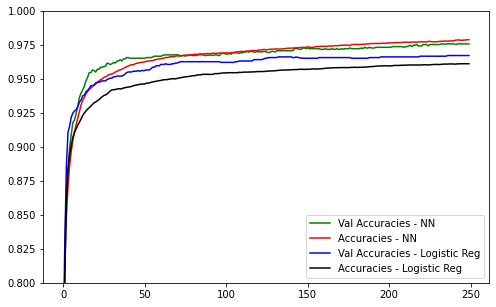

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

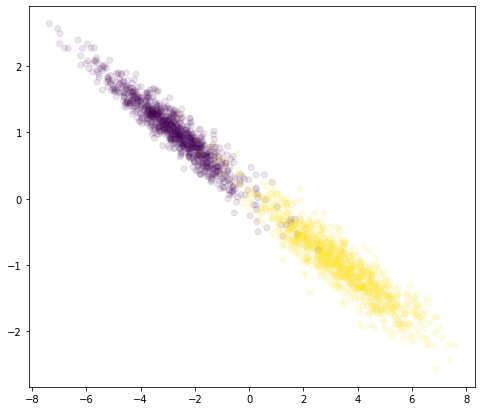

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

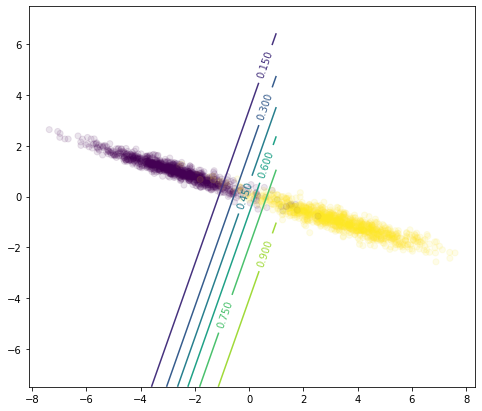

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );